# Naive Bayes

# 1) Prepare a classification model using Naive Bayes for salary data

In [1]:
#Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")


In [2]:
Data1 = pd.read_csv('SalaryData_Test.csv', encoding="latin-1")

In [3]:
Data2 = pd.read_csv('SalaryData_Train.csv', encoding="latin-1")

In [4]:
Data1

age      workclass      education  educationno        maritalstatus  \
0       25        Private           11th            7        Never-married   
1       38        Private        HS-grad            9   Married-civ-spouse   
2       28      Local-gov     Assoc-acdm           12   Married-civ-spouse   
3       44        Private   Some-college           10   Married-civ-spouse   
4       34        Private           10th            6        Never-married   
...    ...            ...            ...          ...                  ...   
15055   33        Private      Bachelors           13        Never-married   
15056   39        Private      Bachelors           13             Divorced   
15057   38        Private      Bachelors           13   Married-civ-spouse   
15058   44        Private      Bachelors           13             Divorced   
15059   35   Self-emp-inc      Bachelors           13   Married-civ-spouse   

               occupation    relationship                 race      sex  \
0       Machine-op-inspct       Own-child                Black     Male   
1         Farming-fishing         Husband                White     Male   
2         Protective-serv         Husband                White     Male   
3       Machine-op-inspct         Husband                Black     Male   
4           Other-service   Not-in-family                White     Male   
...                   ...             ...                  ...      ...   
15055      Prof-specialty       Own-child                White     Male   
15056      Prof-specialty   Not-in-family                White   Female   
15057      Prof-specialty         Husband                White     Male   
15058        Adm-clerical       Own-child   Asian-Pac-Islander     Male   
15059     Exec-managerial         Husband                White     Male   

       capitalgain  capitalloss  hoursperweek          native  Salary  
0                0            0            40   United-States   <=50K  
1                0            0            50   United-States   <=50K  
2                0            0            40   United-States    >50K  
3             7688            0            40   United-States    >50K  
4                0            0            30   United-States   <=50K  
...            ...          ...           ...             ...     ...  
15055            0            0            40   United-States   <=50K  
15056            0            0            36   United-States   <=50K  
15057            0            0            50   United-States   <=50K  
15058         5455            0            40   United-States   <=50K  
15059            0            0            60   United-States    >50K  

[15060 rows x 14 columns]

In [5]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [6]:
Data1.describe()

age   educationno   capitalgain   capitalloss  hoursperweek
count  15060.000000  15060.000000  15060.000000  15060.000000  15060.000000
mean      38.768327     10.112749   1120.301594     89.041899     40.951594
std       13.380676      2.558727   7703.181842    406.283245     12.062831
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       48.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   3770.000000     99.000000

In [7]:
Data1.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [8]:
Data1.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [9]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
Data1['workclass']= label_encoder.fit_transform(Data1['workclass'])
Data1['education']= label_encoder.fit_transform(Data1['education'])
Data1['maritalstatus']= label_encoder.fit_transform(Data1['maritalstatus'])
Data1['occupation']= label_encoder.fit_transform(Data1['occupation'])
Data1['relationship']= label_encoder.fit_transform(Data1['relationship'])
Data1['race']= label_encoder.fit_transform(Data1['race'])
Data1['sex']= label_encoder.fit_transform(Data1['sex'])
Data1['native']= label_encoder.fit_transform(Data1['native'])
Data1['Salary']= label_encoder.fit_transform(Data1['Salary'])

In [10]:
Data1

age  workclass  education  educationno  maritalstatus  occupation  \
0       25          2          1            7              4           6   
1       38          2         11            9              2           4   
2       28          1          7           12              2          10   
3       44          2         15           10              2           6   
4       34          2          0            6              4           7   
...    ...        ...        ...          ...            ...         ...   
15055   33          2          9           13              4           9   
15056   39          2          9           13              0           9   
15057   38          2          9           13              2           9   
15058   44          2          9           13              0           0   
15059   35          3          9           13              2           3   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  \
0                 3     2    1            0            0            40   
1                 0     4    1            0            0            50   
2                 0     4    1            0            0            40   
3                 0     2    1         7688            0            40   
4                 1     4    1            0            0            30   
...             ...   ...  ...          ...          ...           ...   
15055             3     4    1            0            0            40   
15056             1     4    0            0            0            36   
15057             0     4    1            0            0            50   
15058             3     1    1         5455            0            40   
15059             0     4    1            0            0            60   

       native  Salary  
0          37       0  
1          37       0  
2          37       1  
3          37       1  
4          37       0  
...       ...     ...  
15055      37       0  
15056      37       0  
15057      37       0  
15058      37       0  
15059      37       1  

[15060 rows x 14 columns]

In [11]:
Data1.duplicated().value_counts()

False    14130
True       930
dtype: int64

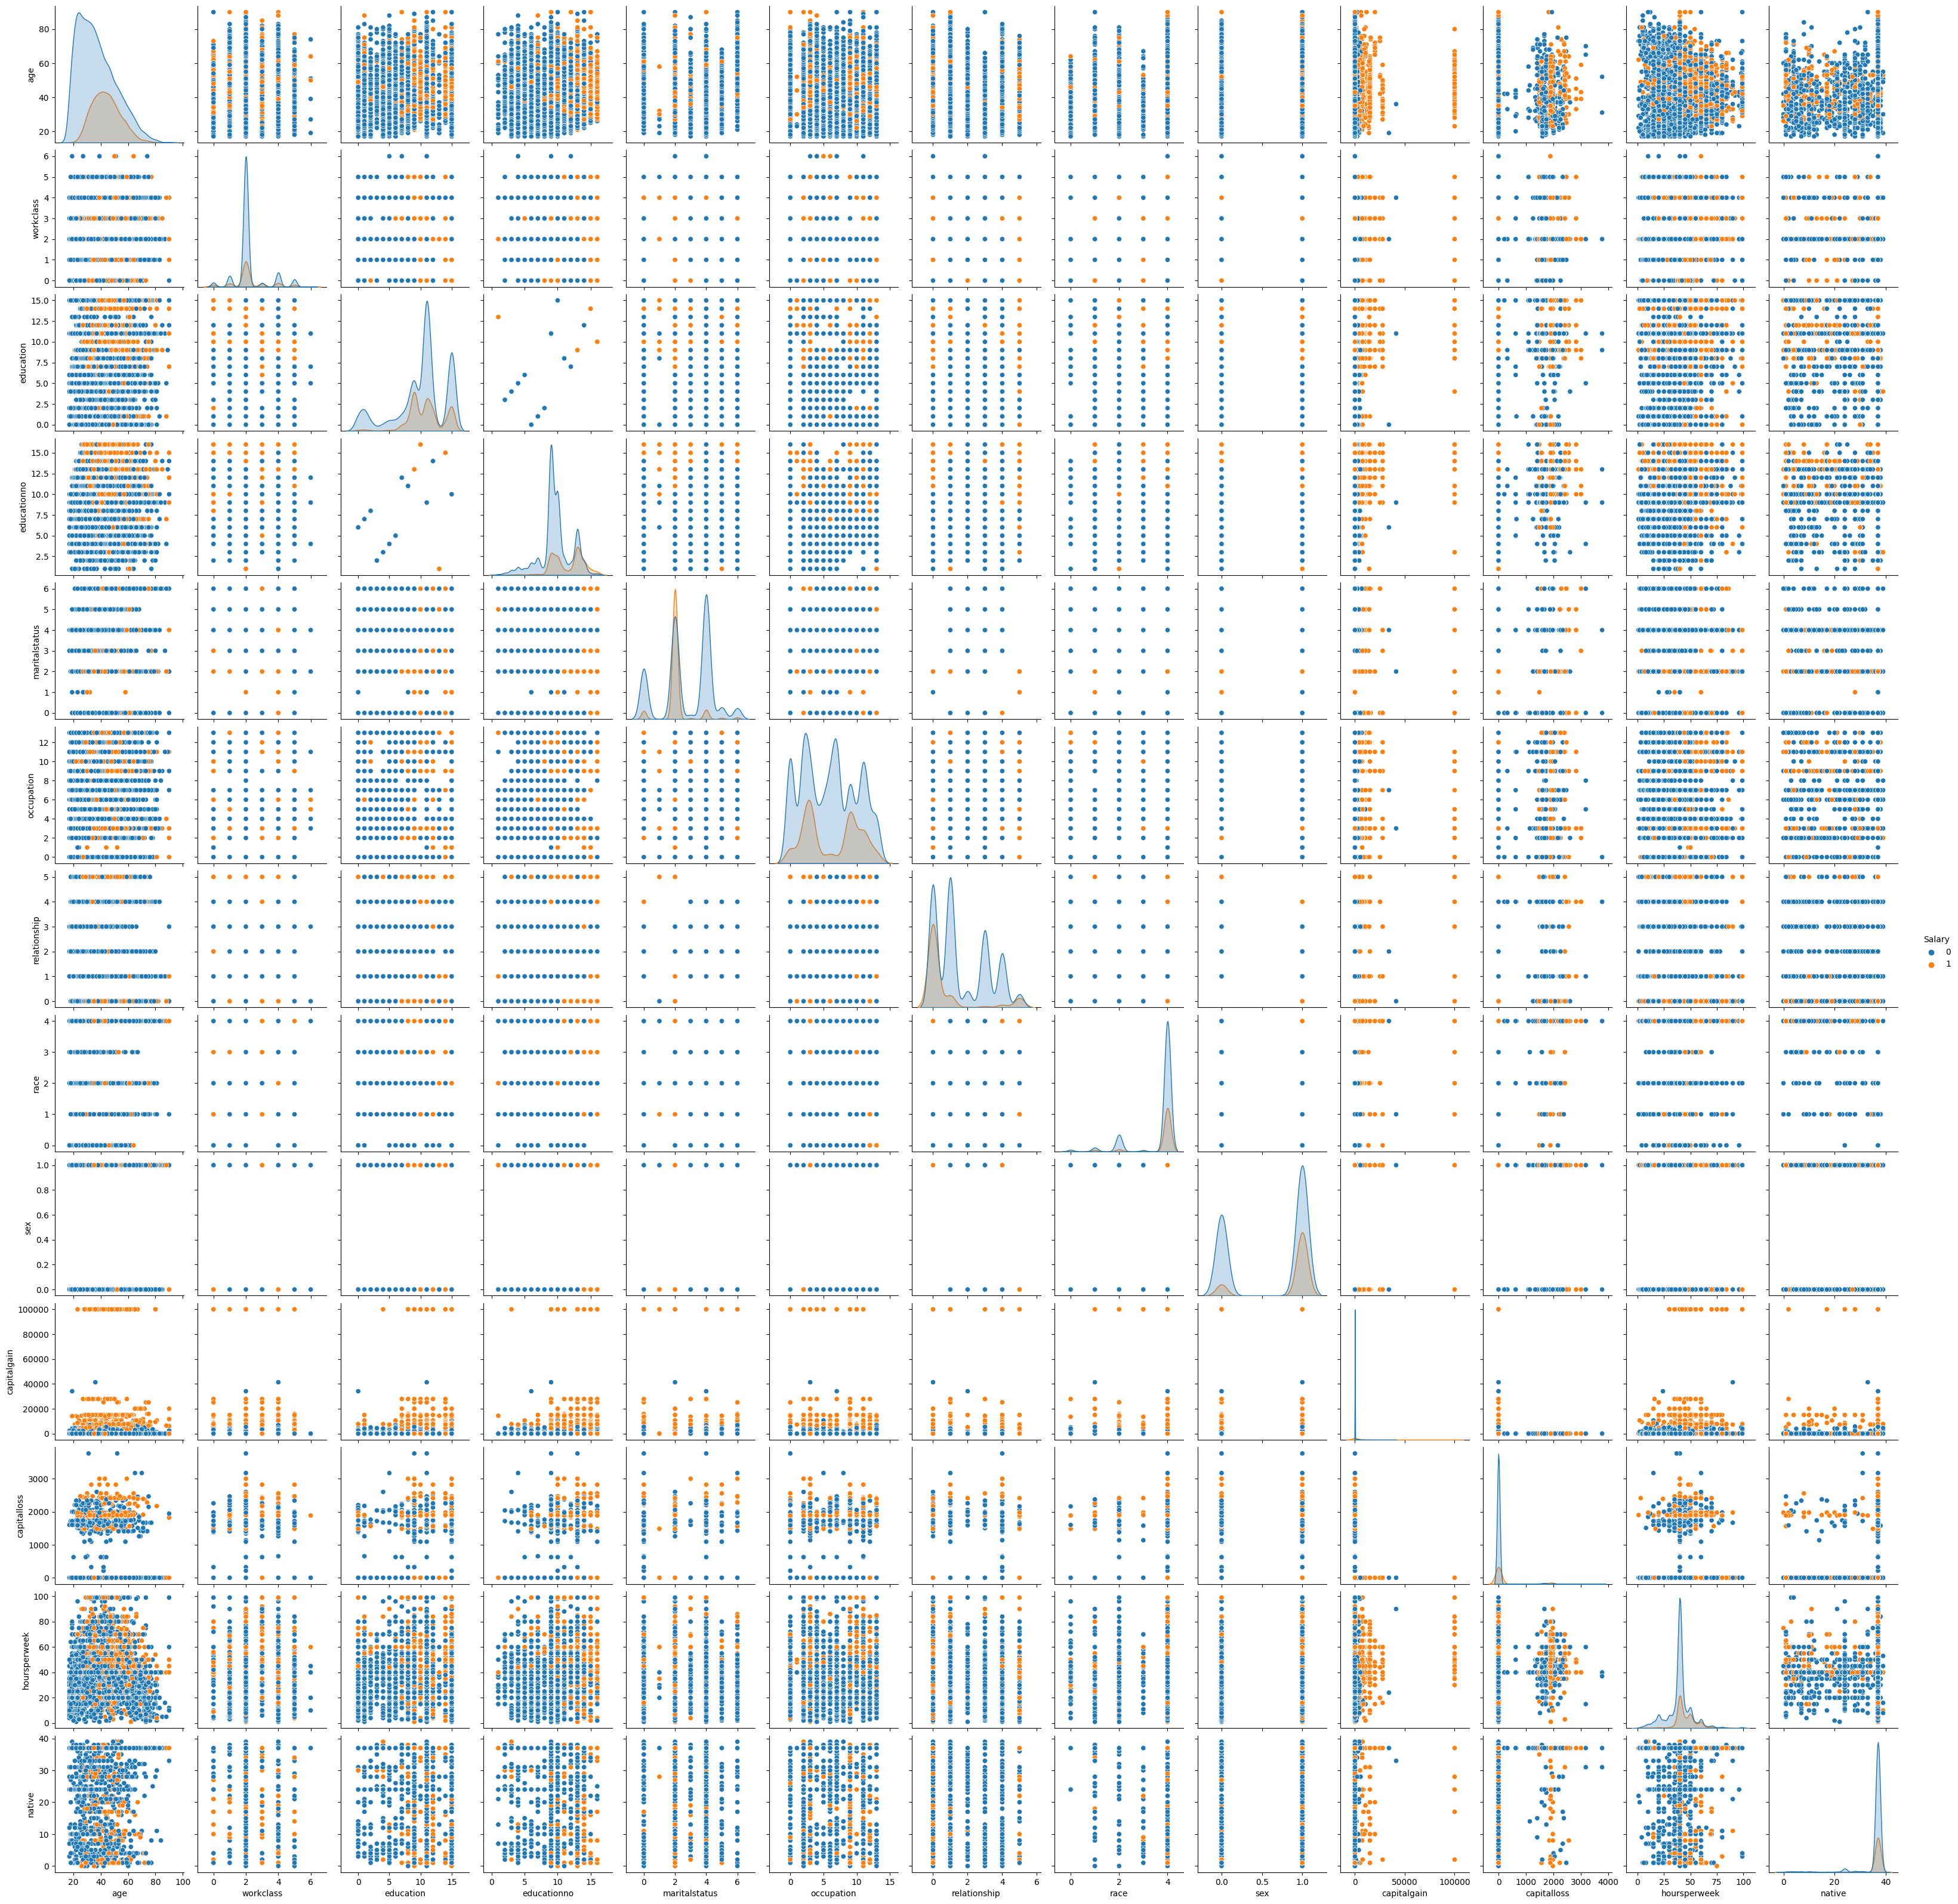

In [12]:
sns.pairplot(Data1,hue="Salary")

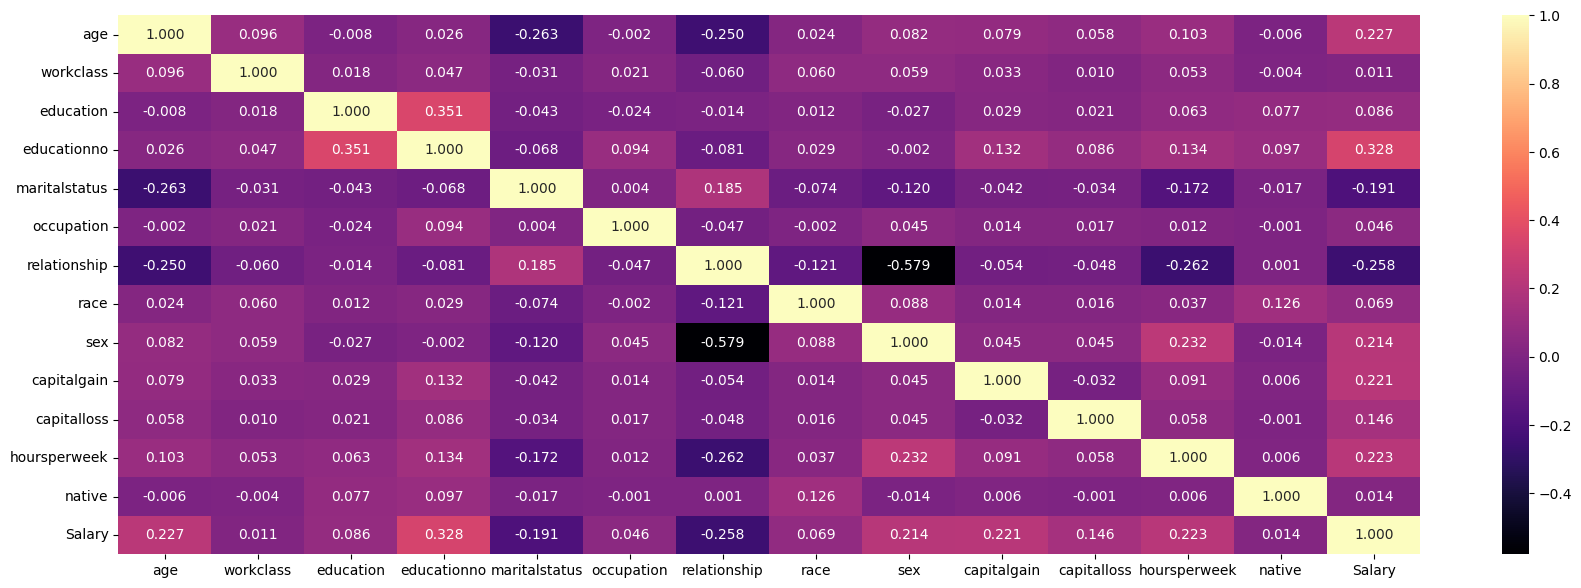

In [13]:
plt.figure(figsize = (21, 7));
sns.heatmap(Data1.corr(), cmap='magma', annot=True, fmt=".3f")
plt.show()

In [14]:
Data2

age          workclass    education  educationno        maritalstatus  \
0       39          State-gov    Bachelors           13        Never-married   
1       50   Self-emp-not-inc    Bachelors           13   Married-civ-spouse   
2       38            Private      HS-grad            9             Divorced   
3       53            Private         11th            7   Married-civ-spouse   
4       28            Private    Bachelors           13   Married-civ-spouse   
...    ...                ...          ...          ...                  ...   
30156   27            Private   Assoc-acdm           12   Married-civ-spouse   
30157   40            Private      HS-grad            9   Married-civ-spouse   
30158   58            Private      HS-grad            9              Widowed   
30159   22            Private      HS-grad            9        Never-married   
30160   52       Self-emp-inc      HS-grad            9   Married-civ-spouse   

               occupation    relationship    race      sex  capitalgain  \
0            Adm-clerical   Not-in-family   White     Male         2174   
1         Exec-managerial         Husband   White     Male            0   
2       Handlers-cleaners   Not-in-family   White     Male            0   
3       Handlers-cleaners         Husband   Black     Male            0   
4          Prof-specialty            Wife   Black   Female            0   
...                   ...             ...     ...      ...          ...   
30156        Tech-support            Wife   White   Female            0   
30157   Machine-op-inspct         Husband   White     Male            0   
30158        Adm-clerical       Unmarried   White   Female            0   
30159        Adm-clerical       Own-child   White     Male            0   
30160     Exec-managerial            Wife   White   Female        15024   

       capitalloss  hoursperweek          native  Salary  
0                0            40   United-States   <=50K  
1                0            13   United-States   <=50K  
2                0            40   United-States   <=50K  
3                0            40   United-States   <=50K  
4                0            40            Cuba   <=50K  
...            ...           ...             ...     ...  
30156            0            38   United-States   <=50K  
30157            0            40   United-States    >50K  
30158            0            40   United-States   <=50K  
30159            0            20   United-States   <=50K  
30160            0            40   United-States    >50K  

[30161 rows x 14 columns]

In [15]:
Data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [16]:
Data2.describe()

age   educationno   capitalgain   capitalloss  hoursperweek
count  30161.000000  30161.000000  30161.000000  30161.000000  30161.000000
mean      38.438115     10.121316   1092.044064     88.302311     40.931269
std       13.134830      2.550037   7406.466611    404.121321     11.980182
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       47.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   4356.000000     99.000000

In [17]:
Data2.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [18]:
Data1.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [19]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
Data2['workclass']= label_encoder.fit_transform(Data2['workclass'])
Data2['education']= label_encoder.fit_transform(Data2['education'])
Data2['maritalstatus']= label_encoder.fit_transform(Data2['maritalstatus'])
Data2['occupation']= label_encoder.fit_transform(Data2['occupation'])
Data2['relationship']= label_encoder.fit_transform(Data2['relationship'])
Data2['race']= label_encoder.fit_transform(Data2['race'])
Data2['sex']= label_encoder.fit_transform(Data2['sex'])
Data2['native']= label_encoder.fit_transform(Data2['native'])
Data2['Salary']= label_encoder.fit_transform(Data2['Salary'])

In [20]:
Data2

age  workclass  education  educationno  maritalstatus  occupation  \
0       39          5          9           13              4           0   
1       50          4          9           13              2           3   
2       38          2         11            9              0           5   
3       53          2          1            7              2           5   
4       28          2          9           13              2           9   
...    ...        ...        ...          ...            ...         ...   
30156   27          2          7           12              2          12   
30157   40          2         11            9              2           6   
30158   58          2         11            9              6           0   
30159   22          2         11            9              4           0   
30160   52          3         11            9              2           3   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  \
0                 1     4    1         2174            0            40   
1                 0     4    1            0            0            13   
2                 1     4    1            0            0            40   
3                 0     2    1            0            0            40   
4                 5     2    0            0            0            40   
...             ...   ...  ...          ...          ...           ...   
30156             5     4    0            0            0            38   
30157             0     4    1            0            0            40   
30158             4     4    0            0            0            40   
30159             3     4    1            0            0            20   
30160             5     4    0        15024            0            40   

       native  Salary  
0          37       0  
1          37       0  
2          37       0  
3          37       0  
4           4       0  
...       ...     ...  
30156      37       0  
30157      37       1  
30158      37       0  
30159      37       0  
30160      37       1  

[30161 rows x 14 columns]

In [21]:
Data2.duplicated().value_counts()

False    26903
True      3258
dtype: int64

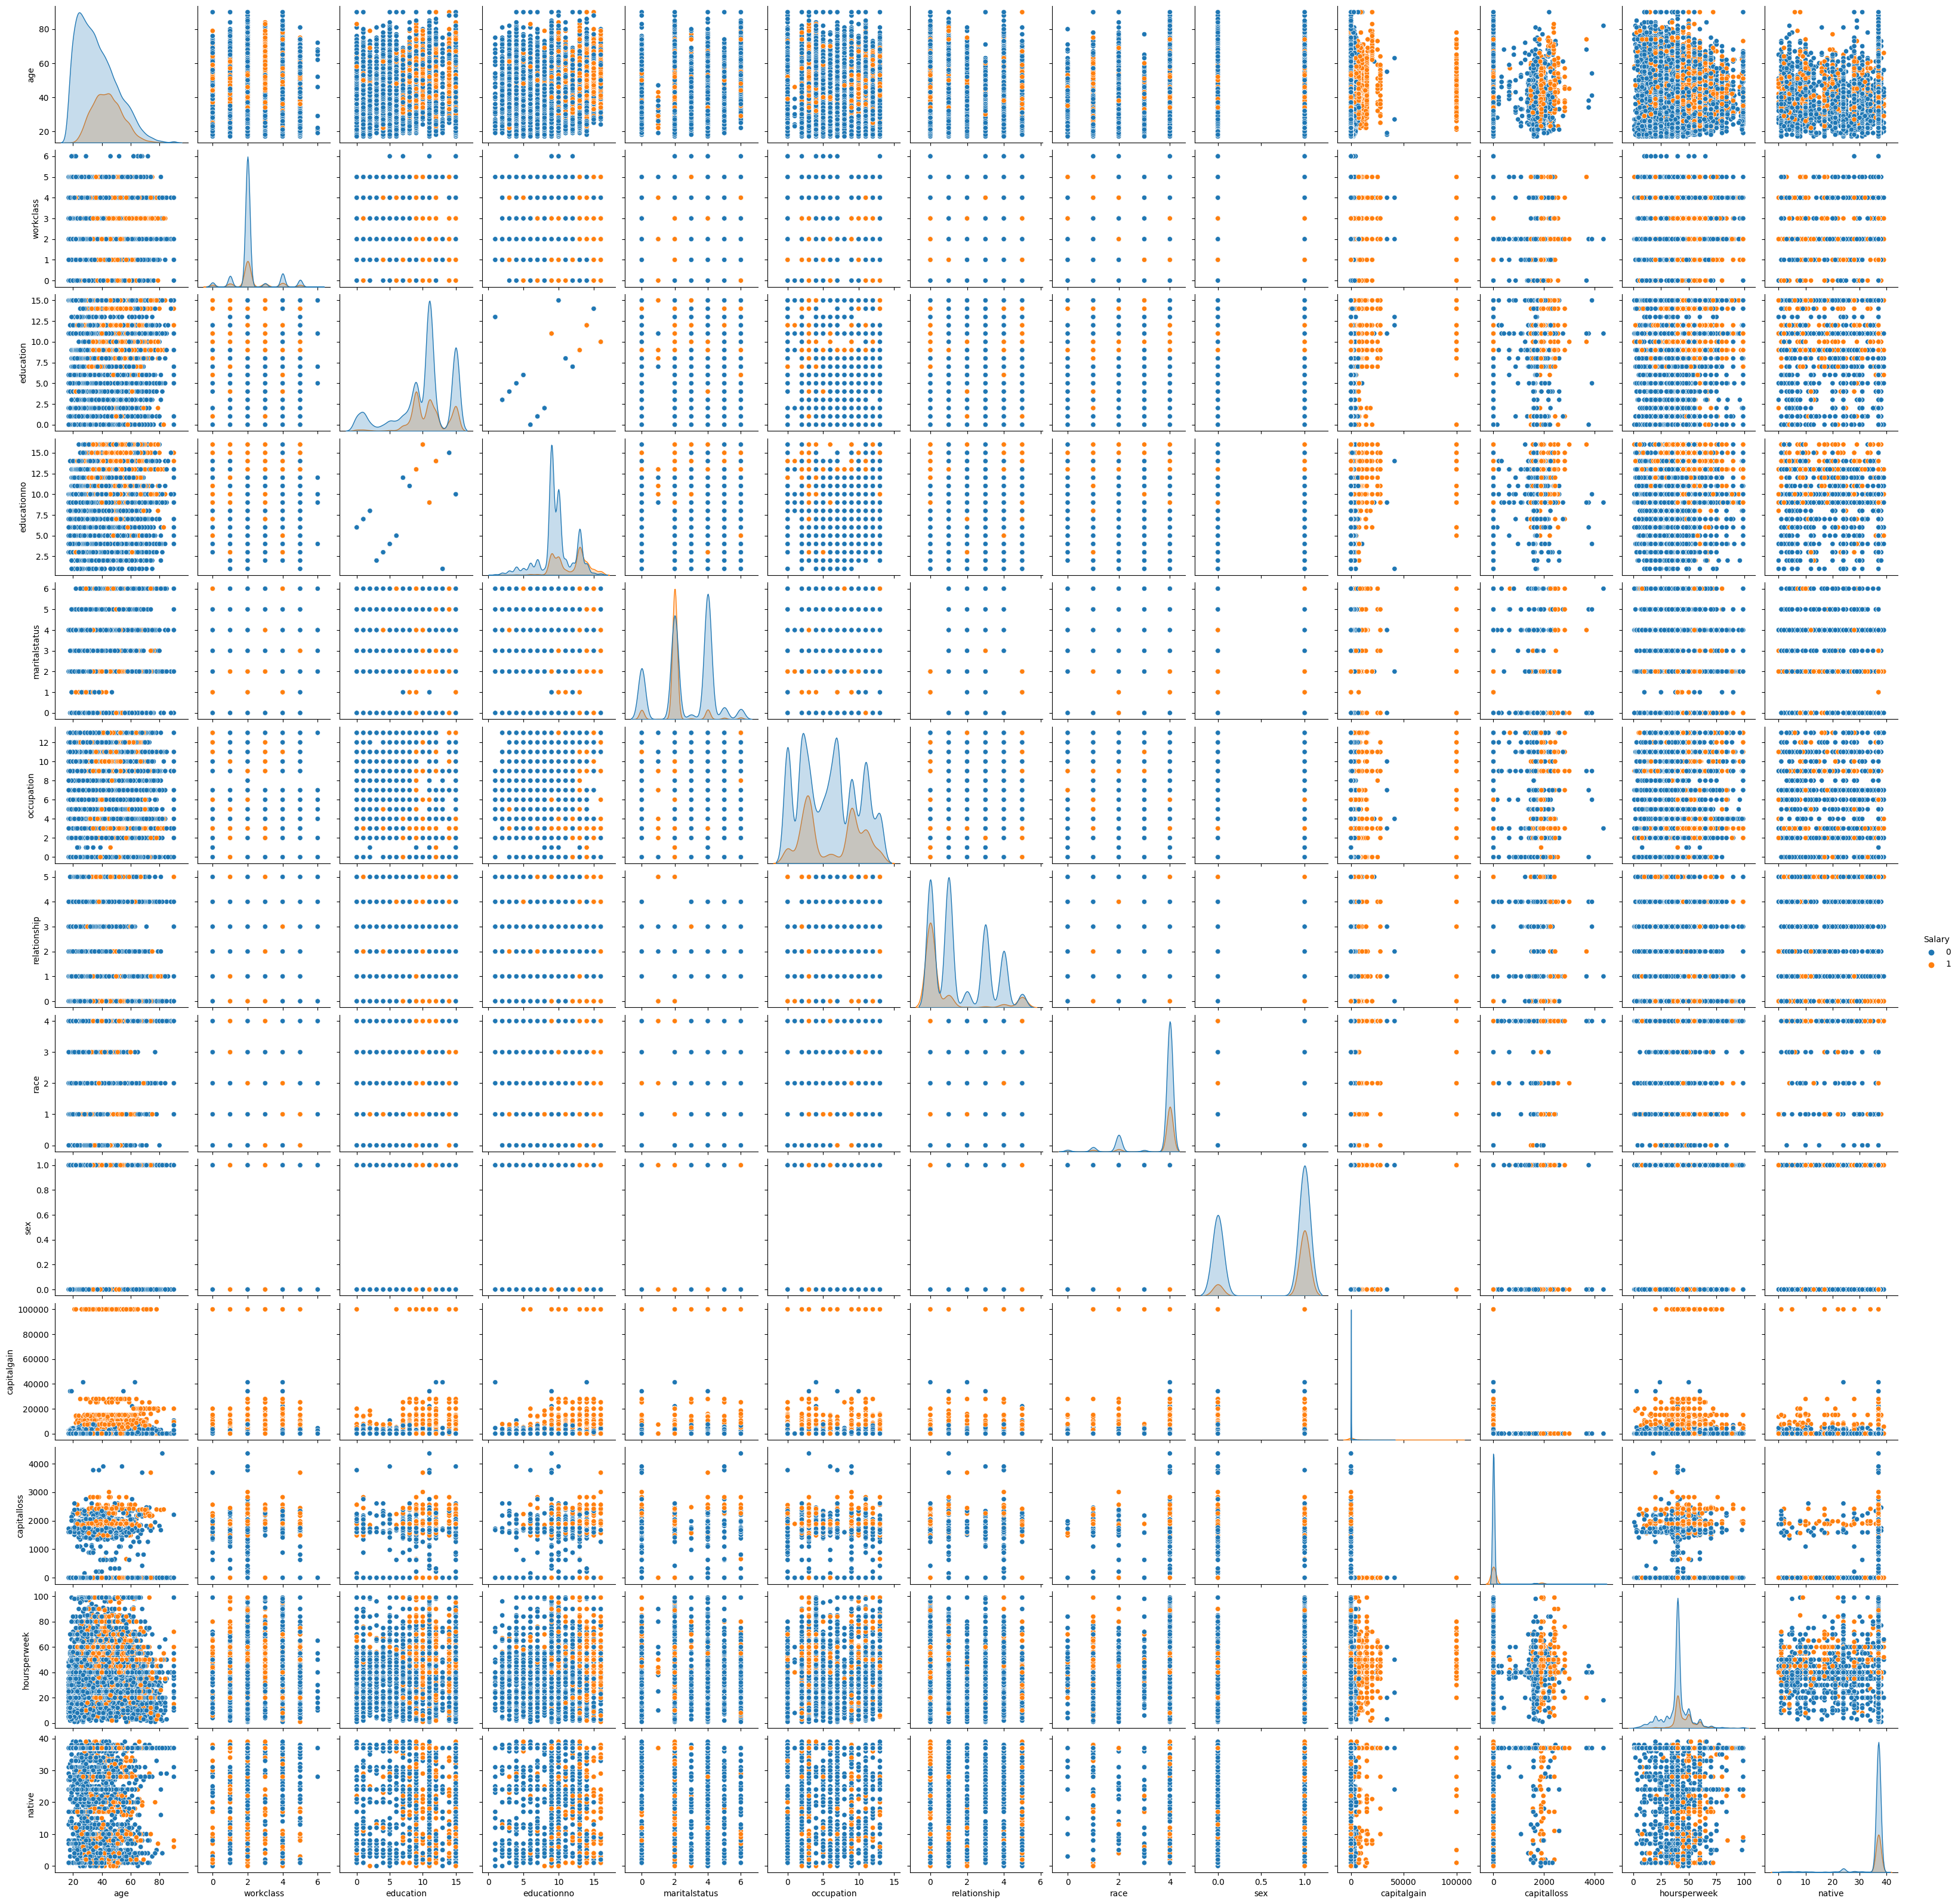

In [22]:
sns.pairplot(Data2,hue="Salary")

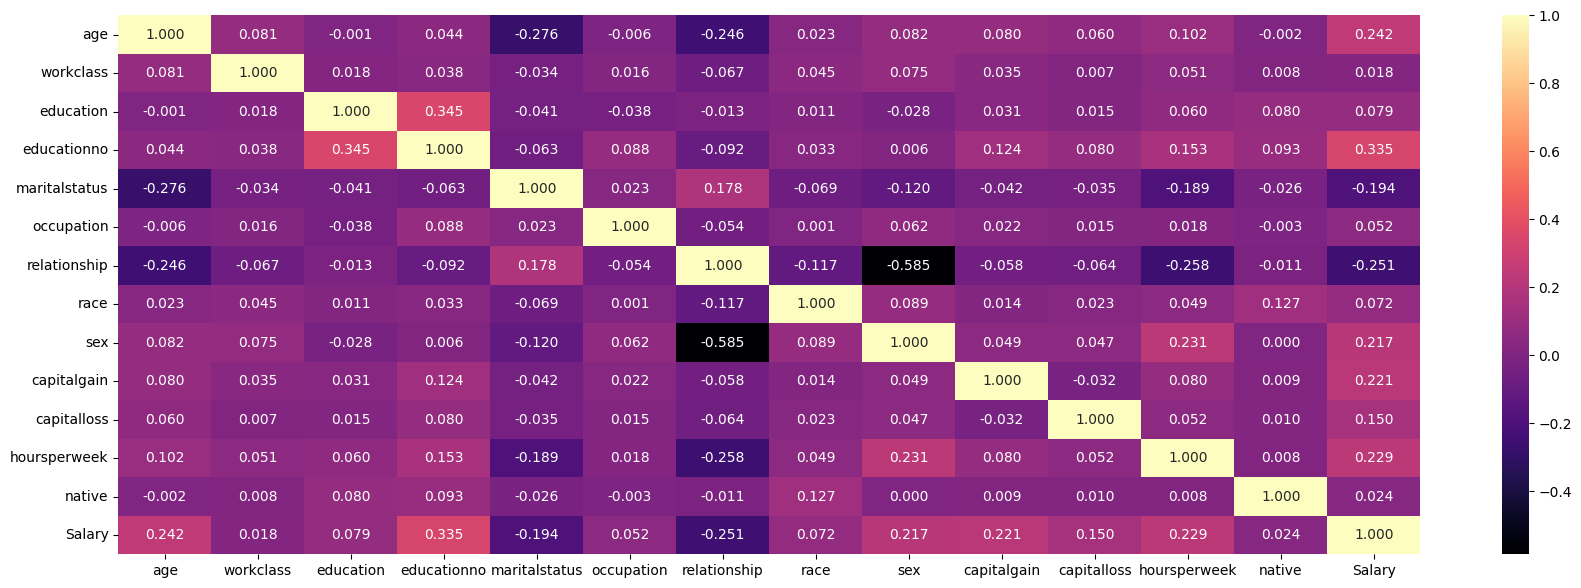

In [23]:
plt.figure(figsize = (21, 7));
sns.heatmap(Data2.corr(), cmap='magma', annot=True, fmt=".3f")
plt.show()

# Train Test Split

In [24]:
xtrain = Data1.iloc[:,0:13]
ytrain = Data1.iloc[:,-1]

In [25]:
xtest = Data2.iloc[:,0:13]
ytest = Data2.iloc[:,-1]

In [26]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((15060, 13), (15060,), (30161, 13), (30161,))

# Naive Bayes Classification

#  MultinomialNB

In [27]:
nb = MultinomialNB()
nb.fit(xtrain,ytrain)
ypred = nb.predict(xtest)

In [28]:
print(nb.score(xtrain,ytrain))
print(nb.score(xtest,ytest))
print(classification_report(ytest,ypred))

0.7749667994687915
0.7729186698053778
              precision    recall  f1-score   support

           0       0.79      0.96      0.86     22653
           1       0.63      0.21      0.32      7508

    accuracy                           0.77     30161
   macro avg       0.71      0.59      0.59     30161
weighted avg       0.75      0.77      0.73     30161



# GaussianNB

In [29]:
GB = GaussianNB()
GB.fit(xtrain,ytrain)
ypred = GB.predict(xtest)

In [30]:
print(GB.score(xtrain,ytrain))
print(GB.score(xtest,ytest))
print(classification_report(ytest,ypred))

0.7942231075697211
0.7943370577898611
              precision    recall  f1-score   support

           0       0.81      0.95      0.87     22653
           1       0.68      0.32      0.44      7508

    accuracy                           0.79     30161
   macro avg       0.75      0.64      0.66     30161
weighted avg       0.78      0.79      0.77     30161

